In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

# def load_csvs(path):

#     X_train = pd.read_csv(f'{path}/X_trainval.csv', index_col=0)
#     X_train_hat = pd.read_csv(f'{path}/X_trainval_hat.csv', index_col=0)
#     X_test = pd.read_csv(f'{path}/X_test.csv', index_col=0)
#     X_test_hat = pd.read_csv(f'{path}/X_test_hat.csv', index_col=0)
#     y_train = pd.read_csv(f'{path}/y_trainval.csv', index_col=0)
#     y_train_hat = pd.read_csv(f'{path}/y_trainval_hat.csv', index_col=0)
#     y_test = pd.read_csv(f'{path}/y_test.csv', index_col=0)
#     y_test_hat = pd.read_csv(f'{path}/y_test_hat.csv', index_col=0)

#     return X_train, X_train_hat, X_test, X_test_hat, y_train, y_train_hat, y_test, y_test_hat

sys.path.append('../experiments/')
results = []

results_dir = f'../results/cub_hydra'
experiment_filename = '../experiments/cub_distillation_edit.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

2025-01-13 13:51:53.293897: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 13:51:54.255941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/mattyshen/anaconda3/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
100%|███████████████████████████████████████| 126/126 [00:00<00:00, 1418.71it/s]


experiment varied these params: ['model_name', 'X_type', 'max_rules', 'max_trees', 'post_max_features', 'size_edit']


model_name          X_type  max_rules  max_trees  post_max_features  size_edit
FIGSHydraRegressor  binary  10         5          10.0               19.0         1
                                       7          14.0               19.0         1
                                       10         20.0               19.0         1
                            15         5          10.0               19.0         1
                                       7          14.0               19.0         1
                                                                                 ..
FTDHydraRegressor   gpt4    15         7          14.0               19.0         1
                                       10         20.0               19.0         1
                            20         5          10.0               19.0         1
                                       7          14.0               19.0         1
                                       10         20.0               19.0        

In [2]:
r.columns

Index(['task_type', 'model_name', 'X_type', 'thresh', 'Y_type', 'save_dir',
       'max_rules', 'max_trees', 'max_depth', 'pre_interaction',
       'pre_max_features', 'post_interaction', 'post_max_features', 'mo',
       'device', 'num_clusters', 'concepts_to_edit', 'use_cache',
       'save_dir_unique', 'cbm_true_seed1_accuracy_trainval',
       'cbm_true_seed1_accuracy_test',
       'distiller_true_seed1_accuracy_trainval',
       'distiller_true_seed1_accuracy_test',
       'distiller_cbm_seed1_accuracy_trainval',
       'distiller_cbm_seed1_accuracy_test', '%_correct_seed1_overlap_trainval',
       '%_correct_seed1_overlap_test',
       'edited_cbm_true_seed1_accuracy_trainval',
       'edited_cbm_true_seed1_accuracy_test',
       'edited_distiller_true_seed1_accuracy_trainval',
       'edited_distiller_true_seed1_accuracy_test',
       'edited_distiller_cbm_seed1_accuracy_trainval',
       'edited_distiller_cbm_seed1_accuracy_test',
       'edited_%_correct_seed1_overlap_trainval

In [3]:
r.loc[(r.X_type == 'binary') & (r.thresh == 0), 'X_type'] = 'F1'

In [4]:
#performance
r['mean_cbm_true_accuracy_trainval'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_trainval'] = np.std([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_cbm_true_accuracy_test'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_test'] = np.std([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_true_accuracy_trainval'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_trainval'] = np.std([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_true_accuracy_test'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_test'] = np.std([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_cbm_accuracy_trainval'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_trainval'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_cbm_accuracy_test'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_test'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#correct overlap

r['mean_%_correct_overlap_trainval'] = np.mean([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_trainval'] = np.std([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_%_correct_overlap_test'] = np.mean([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_test'] = np.std([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

#edited performance

r['mean_edited_cbm_true_accuracy_trainval'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_trainval'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_cbm_true_accuracy_test'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_test'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_true_accuracy_trainval'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_trainval'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_true_accuracy_test'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_test'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_cbm_accuracy_trainval'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_trainval'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_cbm_accuracy_test'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_test'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#edited correct overlap

r['mean_edited_%_correct_overlap_trainval'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_trainval'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_%_correct_overlap_test'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_test'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

In [5]:
r = r.drop(columns  = ['save_dir', 'save_dir_unique', 'use_cache', 'device']
      +['cbm_true_seed1_accuracy_trainval', 'cbm_true_seed1_accuracy_test',
       'distiller_true_seed1_accuracy_trainval',
       'distiller_true_seed1_accuracy_test',
       'distiller_cbm_seed1_accuracy_trainval',
       'distiller_cbm_seed1_accuracy_test', '%_correct_seed1_overlap_trainval',
       '%_correct_seed1_overlap_test',
       'edited_cbm_true_seed1_accuracy_trainval',
       'edited_cbm_true_seed1_accuracy_test',
       'edited_distiller_true_seed1_accuracy_trainval',
       'edited_distiller_true_seed1_accuracy_test',
       'edited_distiller_cbm_seed1_accuracy_trainval',
       'edited_distiller_cbm_seed1_accuracy_test',
       'edited_%_correct_seed1_overlap_trainval',
       'edited_%_correct_seed1_overlap_test',
       'cbm_true_seed2_accuracy_trainval', 'cbm_true_seed2_accuracy_test',
       'distiller_true_seed2_accuracy_trainval',
       'distiller_true_seed2_accuracy_test',
       'distiller_cbm_seed2_accuracy_trainval',
       'distiller_cbm_seed2_accuracy_test', '%_correct_seed2_overlap_trainval',
       '%_correct_seed2_overlap_test',
       'edited_cbm_true_seed2_accuracy_trainval',
       'edited_cbm_true_seed2_accuracy_test',
       'edited_distiller_true_seed2_accuracy_trainval',
       'edited_distiller_true_seed2_accuracy_test',
       'edited_distiller_cbm_seed2_accuracy_trainval',
       'edited_distiller_cbm_seed2_accuracy_test',
       'edited_%_correct_seed2_overlap_trainval',
       'edited_%_correct_seed2_overlap_test',
       'cbm_true_seed3_accuracy_trainval', 'cbm_true_seed3_accuracy_test',
       'distiller_true_seed3_accuracy_trainval',
       'distiller_true_seed3_accuracy_test',
       'distiller_cbm_seed3_accuracy_trainval',
       'distiller_cbm_seed3_accuracy_test', '%_correct_seed3_overlap_trainval',
       '%_correct_seed3_overlap_test',
       'edited_cbm_true_seed3_accuracy_trainval',
       'edited_cbm_true_seed3_accuracy_test',
       'edited_distiller_true_seed3_accuracy_trainval',
       'edited_distiller_true_seed3_accuracy_test',
       'edited_distiller_cbm_seed3_accuracy_trainval',
       'edited_distiller_cbm_seed3_accuracy_test',
       'edited_%_correct_seed3_overlap_trainval',
       'edited_%_correct_seed3_overlap_test'])

In [6]:
r.X_type.value_counts()

gpt2       18
binary     18
gpt3       18
gpt4       18
cluster    18
gpt1       18
global     18
Name: X_type, dtype: int64

In [7]:
def plot_accuracy_by_x_type_and_model(data, x_type_col, model_name_col, max_trees_col, max_rules_col, train_col, val_col):
    """
    Creates plots for train and validation accuracy based on X_type, model_name, max_trees, and max_rules.

    Parameters:
        data (pd.DataFrame): Input data containing the required columns.
        x_type_col (str): Column representing X_type groups.
        model_name_col (str): Column representing model names.
        max_trees_col (str): Column representing the maximum number of trees.
        max_rules_col (str): Column representing the maximum number of rules.
        train_col (str): Column representing training accuracy.
        val_col (str): Column representing validation accuracy.
    """
    for x_type, group in data.groupby(x_type_col):
        max_trees_unique = sorted(group[max_trees_col].unique())
        num_rows = len(max_trees_unique)
        num_cols = 2  # One for train, one for validation

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)
        title = f'Train and Test Accuracies for X Preprocessing: {x_type}'
        fig.suptitle(title, fontsize=16, y=1)

        # Set overall column labels
        axes[0, 0].set_title("Train Accuracy", fontsize=14)
        axes[0, 1].set_title("Test Accuracy", fontsize=14)

        for row_idx, max_trees in enumerate(max_trees_unique):
            row_data = group[group[max_trees_col] == max_trees]

            # Train accuracy plot
            ax_train = axes[row_idx, 0]
            sns.lineplot(data=row_data, x=max_rules_col, y=train_col, hue=model_name_col, ax=ax_train, marker='o')
            ax_train.axhline(y=0.983, color='r', linestyle='--', label='Threshold = 0.983')
            if row_idx == 0:
                ax_train.legend(title='Model')
            else:
                ax_train.get_legend().remove()

            # Validation accuracy plot
            ax_val = axes[row_idx, 1]
            sns.lineplot(data=row_data, x=max_rules_col, y=val_col, hue=model_name_col, ax=ax_val, marker='o')
            ax_val.axhline(y=0.765, color='r', linestyle='--', label='Threshold = 0.765')
            if row_idx == 0:
                ax_val.legend(title='Model')
            else:
                ax_val.get_legend().remove()

            # Set y-label for each row to max_trees
            axes[row_idx, 0].set_ylabel(f"Max Trees: {max_trees}", fontsize=12)

        # Set shared y-label for mean accuracy
        fig.text(-0.04, 0.5, 'Mean Accuracy', va='center', rotation='vertical', fontsize=14)

        # Adjust layout
        plt.tight_layout(rect=[0.05, 0, 1, 0.93])
        #plt.show()
        plt.savefig(f'../figures/hydra/{title}.png')
        print('---- x_type ----')

# Example usage:
# plot_accuracy_by_x_type_and_model(df, "X_type", "model_name", "max_trees", "max_rules", "train_accuracy", "val_accuracy")


---- x_type ----
---- x_type ----
---- x_type ----
---- x_type ----
---- x_type ----
---- x_type ----
---- x_type ----


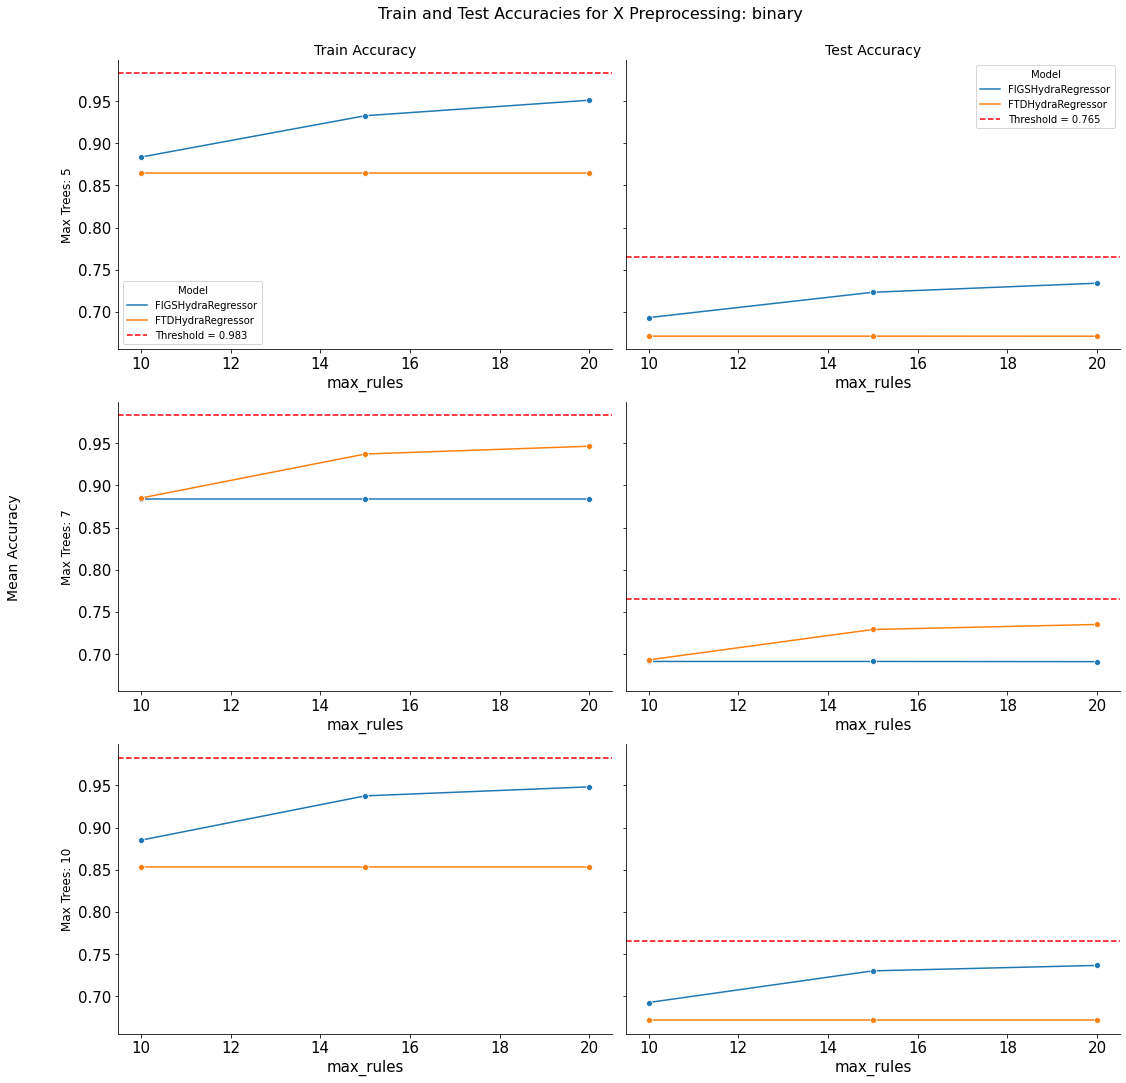

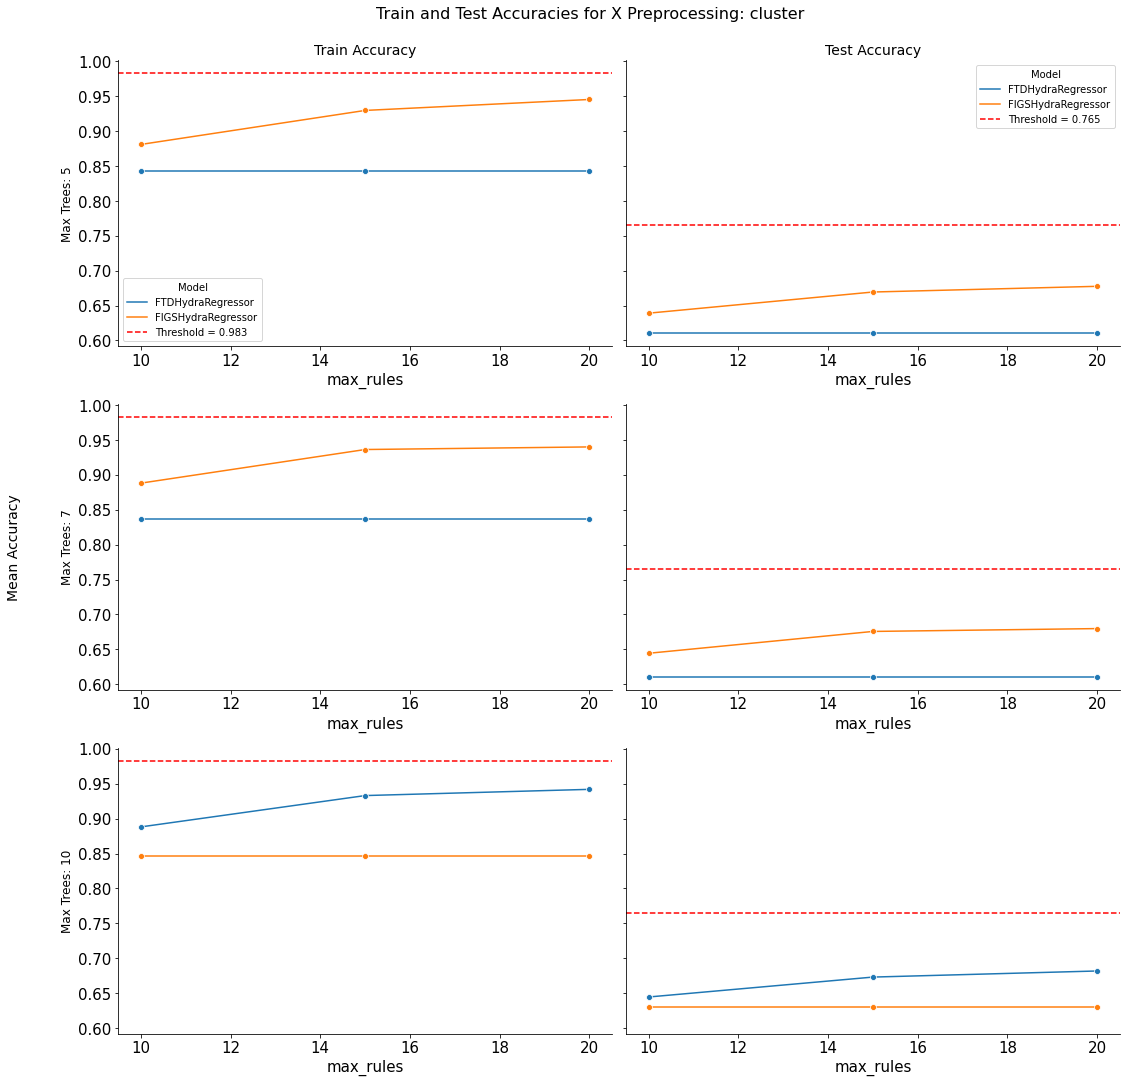

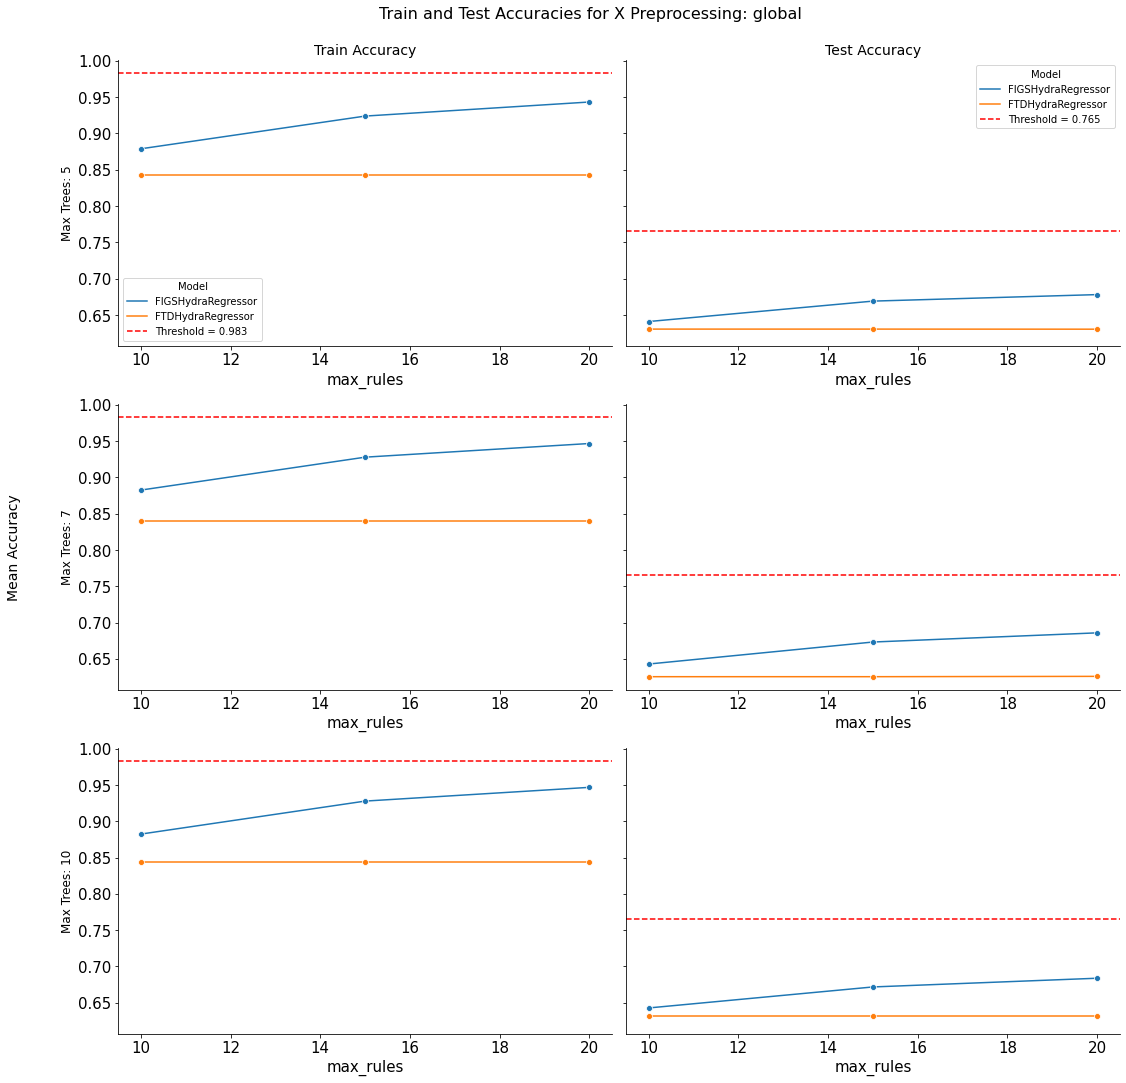

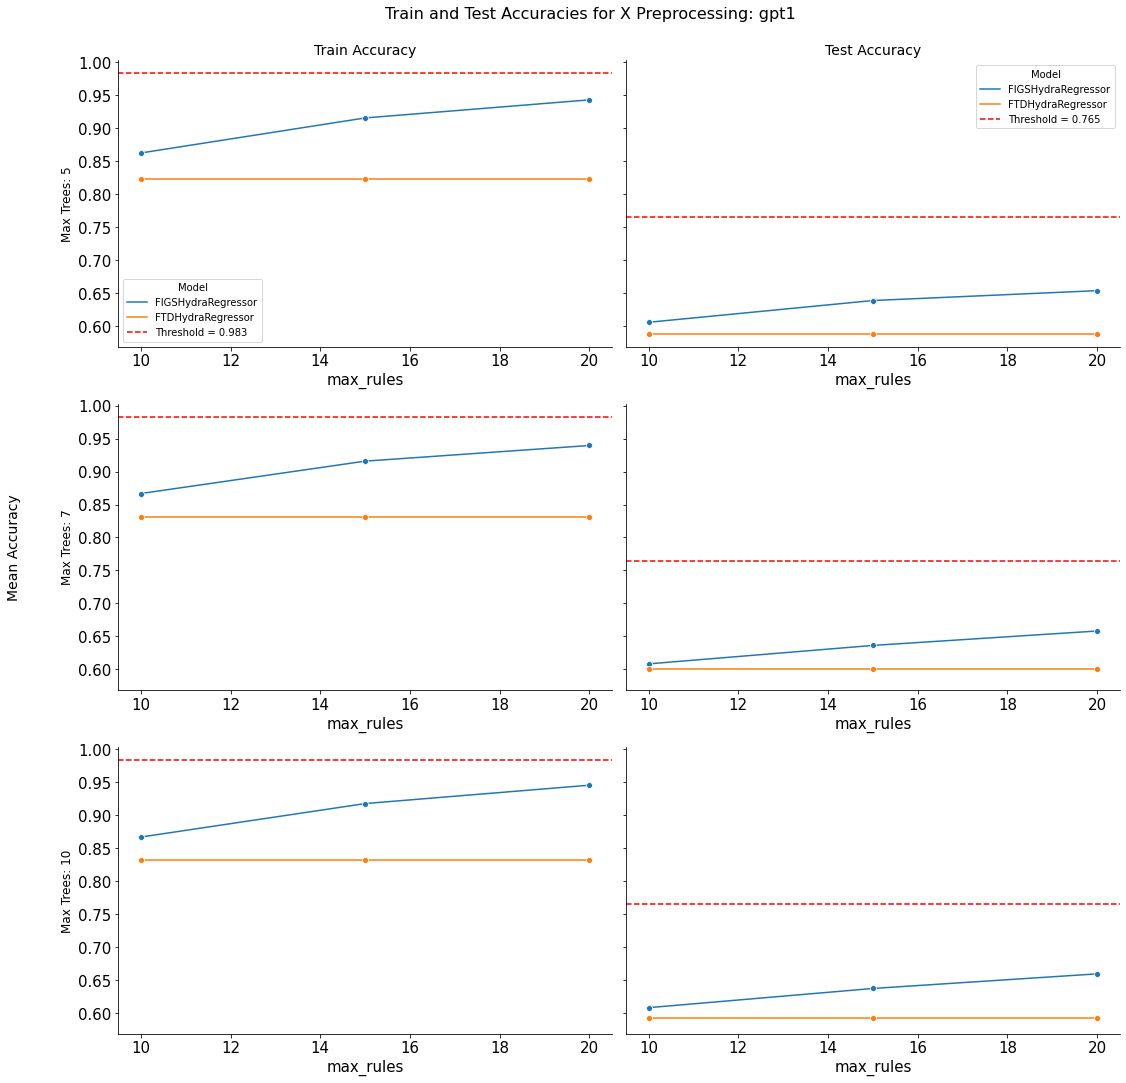

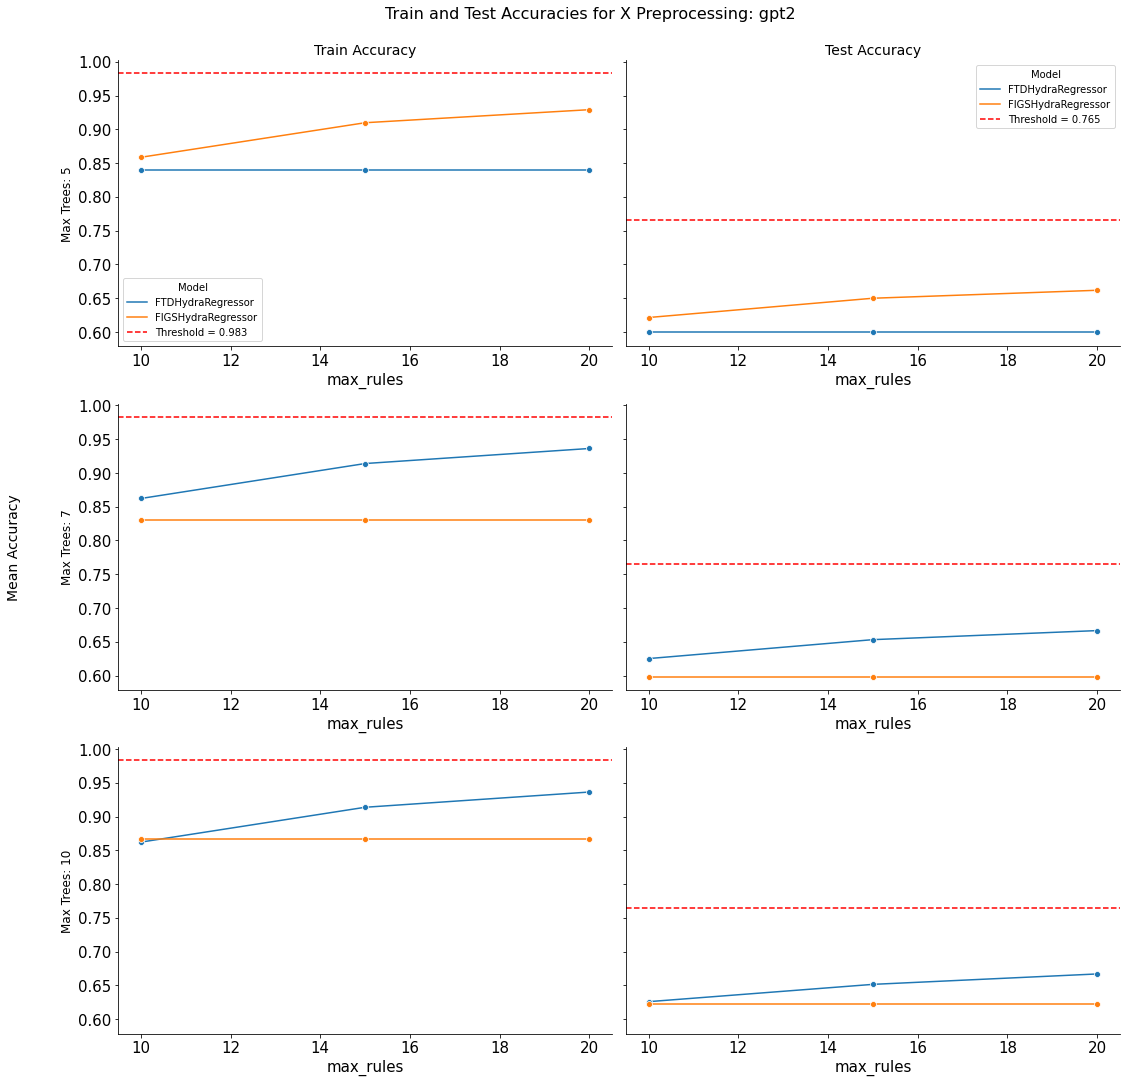

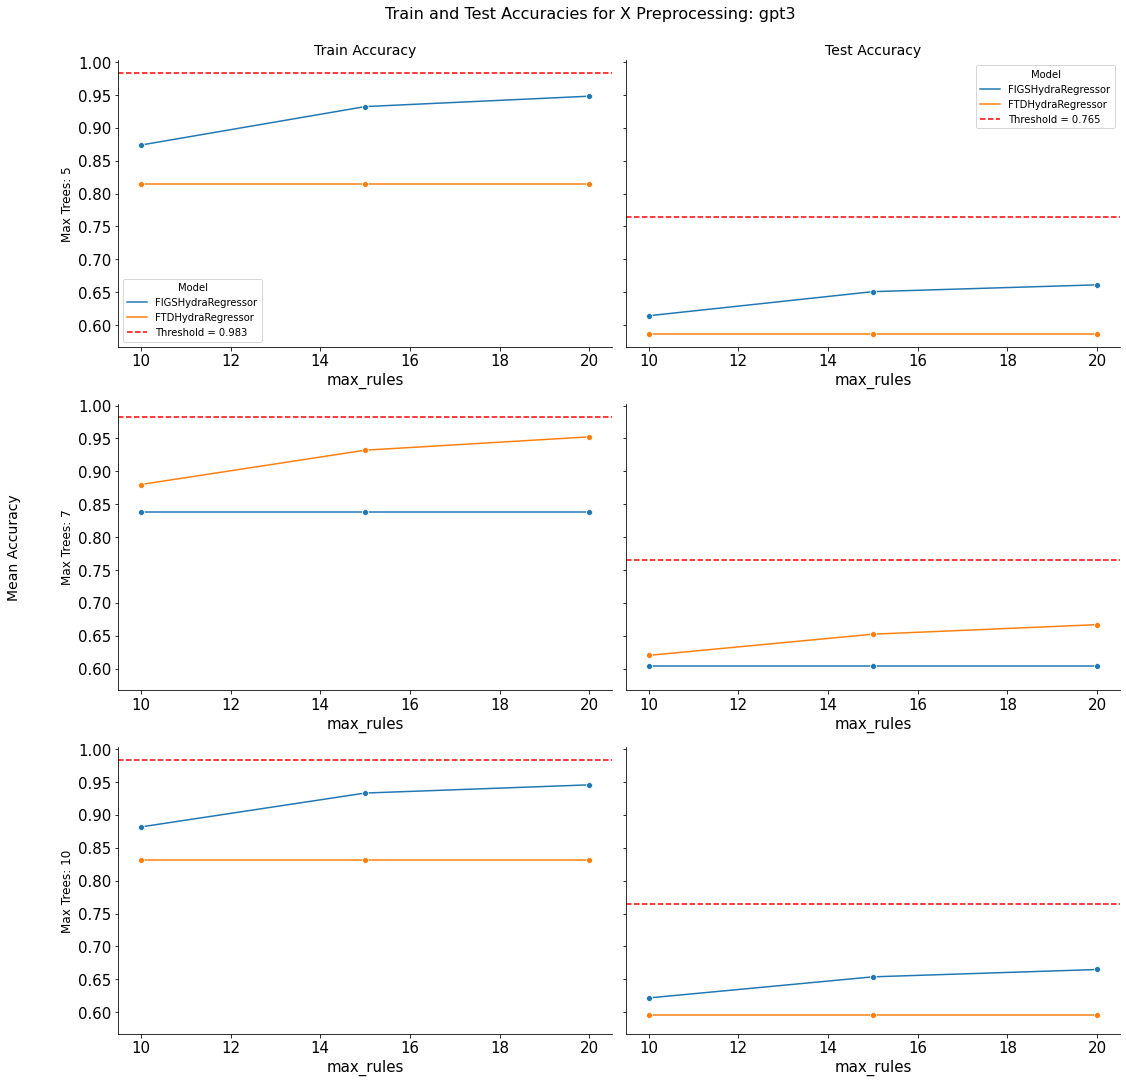

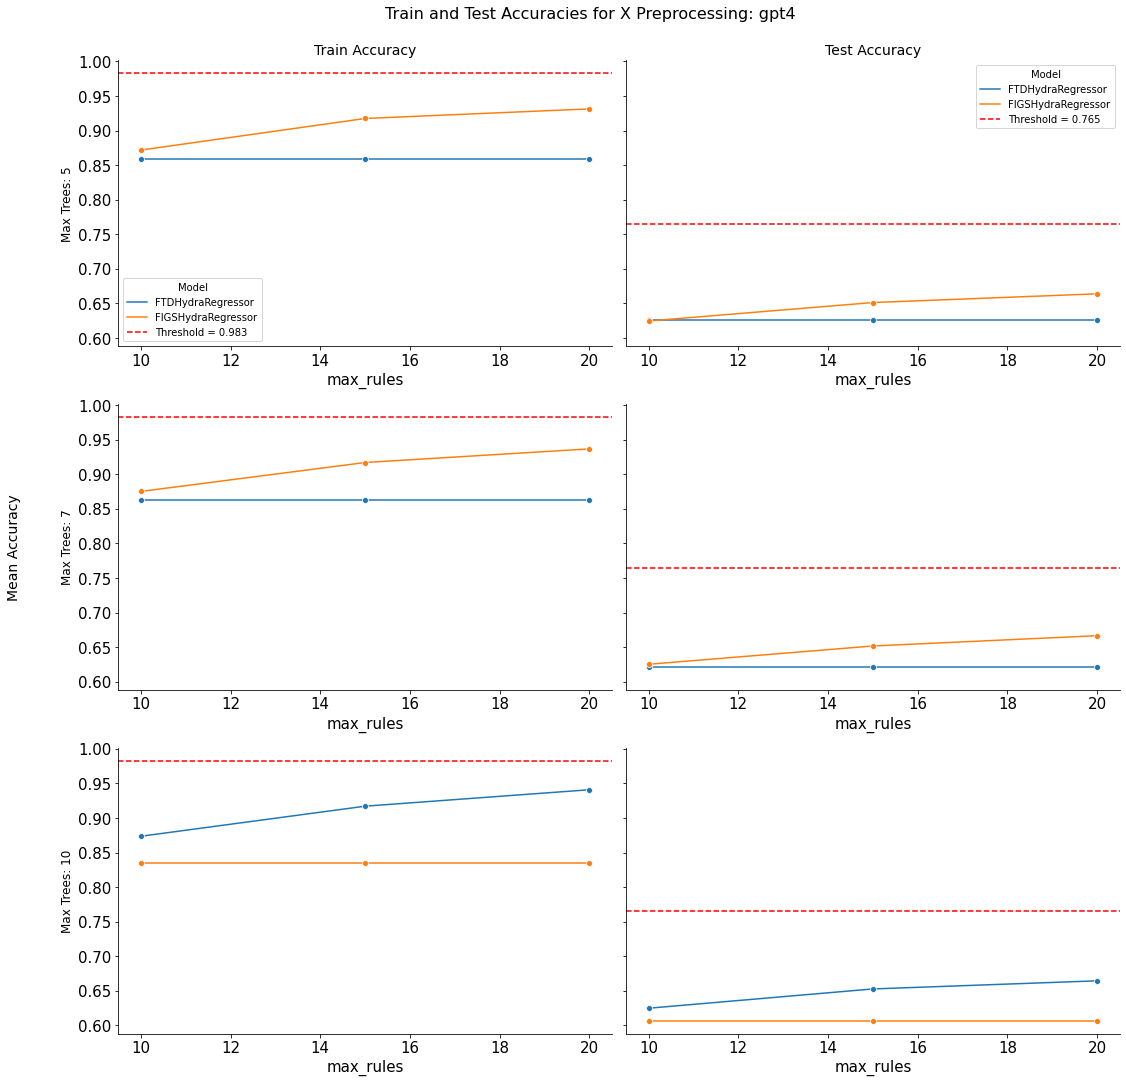

In [8]:
#plot_accuracy_grids_by_X_type(r, 'X_type', "max_trees", "max_rules", "max_depth", 'mean_edited_distiller_true_accuracy_trainval', 'mean_edited_distiller_true_accuracy_test')
plot_accuracy_by_x_type_and_model(r, "X_type", "model_name", "max_trees", "max_rules", "mean_distiller_true_accuracy_trainval", "mean_distiller_true_accuracy_test")

